In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

import pmdarima as pm
print(f"Using pmdarima {pm.__version__}")

symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

Using pmdarima 2.0.4


*PREPROCESSING*

In [13]:
# for symbol in symbols:
symbol = 'AAPL'
print(f"Fetching data for {symbol}")
data = yf.download(symbol, start="2022-03-29", end="2024-03-29")
data

Fetching data for AAPL
[*********************100%%**********************]  1 of 1 completed


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-29,176.690002,179.009995,176.339996,178.960007,176.937988,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,175.761444,92633200
2022-03-31,177.839996,178.029999,174.399994,174.610001,172.637161,103049300
2022-04-01,174.029999,174.880005,171.940002,174.309998,172.340546,78751300
2022-04-04,174.570007,178.490005,174.440002,178.440002,176.423889,76468400
...,...,...,...,...,...,...
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400


*CLASSIC ARIMA*

<Axes: xlabel='Date'>

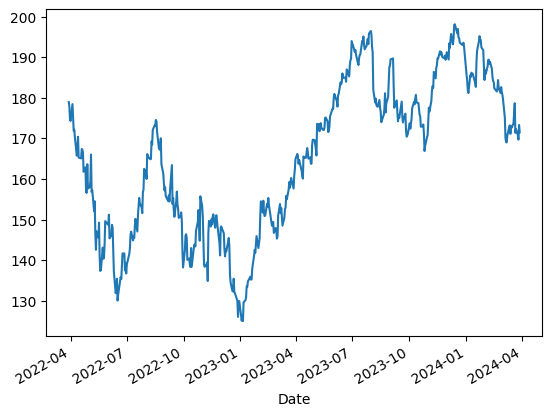

In [14]:
data['Close'].plot()

In [15]:
def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [17]:
stationarity(data['Adj Close'])

Test Statistic: -1.7255822437051223
P-Value: 0.4179822612688292
Non-Stationary
